# Importar las bibliotecas necesarias
Importar las bibliotecas necesarias, incluyendo TensorFlow, Keras, NumPy, etc.

In [3]:
# Import necessary libraries

# TensorFlow and Keras for creating and training the neural network
import tensorflow as tf
from tensorflow import keras

# NumPy for array manipulation and mathematical operations
import numpy as np

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# Sklearn for splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# Pandas for data manipulation and analysis
import pandas as pd

# Os for interacting with the operating system
import os

# Cv2 for image processing
import cv2


# Cargar y preprocesar el conjunto de datos 'data'
Cargar el conjunto de datos 'data' y realizar el preprocesamiento necesario, como la normalización, la codificación one-hot de las etiquetas, etc.

In [4]:
# Define the path to the dataset
data_dir = 'data'

# Define the categories
categories = ['happy', 'sad', 'angry']

# Define the size to which images will be resized
img_size = 50

# Initialize an empty list to store the data
data = []

# Function to create the training data
def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                data.append([new_array, class_num])
            except Exception as e:
                pass

# Call the function to create the training data
create_training_data()

# Shuffle the data
np.random.shuffle(data)

# Separate the features (X) and the labels (y)
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

# Convert the features and labels to NumPy arrays
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

# Normalize the features
X = X / 255.0

# One-hot encode the labels
y = keras.utils.to_categorical(y, num_classes=len(categories))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.

In [5]:
# The code for this section has already been written in the provided code. Here it is extracted:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir la arquitectura de la CNN
Construir la arquitectura de la CNN utilizando la API de Keras. Esto incluirá la adición de capas convolucionales, capas de pooling, capas de dropout y capas densas.

In [6]:
# Import the necessary layers for our CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the convolutional layers
model.add(Flatten())

# Add a dense layer
model.add(Dense(64))
model.add(Activation('relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(len(categories)))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Compilar y entrenar la CNN
Compilar la CNN especificando la función de pérdida, el optimizador y las métricas. Luego, entrenar la CNN en el conjunto de entrenamiento.

In [7]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Save the model
model.save('face_emotion_classifier.h5')

Epoch 1/10


7/7 [==============================] - 2s 68ms/step - loss: 1.1254 - accuracy: 0.3507 - val_loss: 1.0989 - val_accuracy: 0.3585
Epoch 2/10
7/7 [==============================] - 0s 31ms/step - loss: 1.0857 - accuracy: 0.3649 - val_loss: 1.0961 - val_accuracy: 0.3585
Epoch 3/10
7/7 [==============================] - 0s 29ms/step - loss: 1.0841 - accuracy: 0.3649 - val_loss: 1.0997 - val_accuracy: 0.3585
Epoch 4/10
7/7 [==============================] - 0s 32ms/step - loss: 1.0798 - accuracy: 0.4076 - val_loss: 1.0990 - val_accuracy: 0.3585
Epoch 5/10
7/7 [==============================] - 0s 29ms/step - loss: 1.0781 - accuracy: 0.3839 - val_loss: 1.0992 - val_accuracy: 0.3585
Epoch 6/10
7/7 [==============================] - 0s 28ms/step - loss: 1.0672 - accuracy: 0.3981 - val_loss: 1.0955 - val_accuracy: 0.3585
Epoch 7/10
7/7 [==============================] - 0s 28ms/step - loss: 1.0603 - accuracy: 0.4360 - val_loss: 1.0864 - val_accuracy: 0.3774
Epoch 8/10
7/7 [=========

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluar el rendimiento de la CNN
Evaluar el rendimiento de la CNN en el conjunto de prueba.

2/2 - 0s - loss: 1.1019 - accuracy: 0.4151 - 38ms/epoch - 19ms/step

Test accuracy: 0.4150943458080292


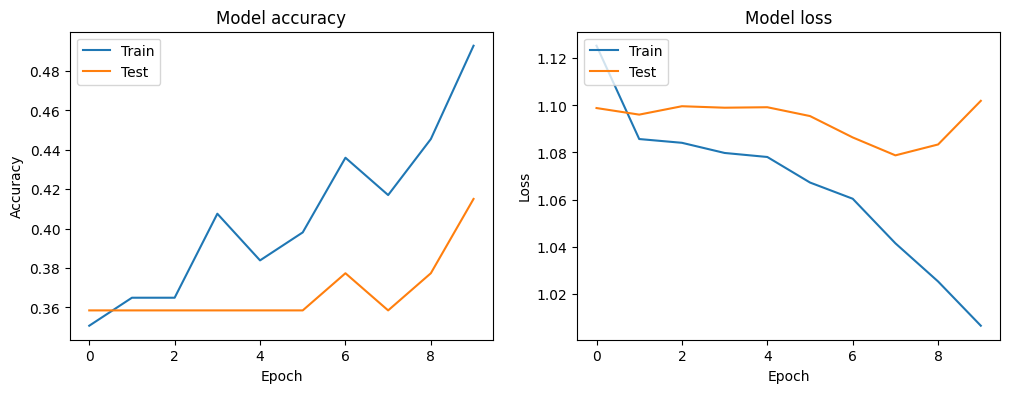

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Visualizar los resultados
Visualizar los resultados del entrenamiento y la evaluación utilizando gráficos de pérdida y precisión.

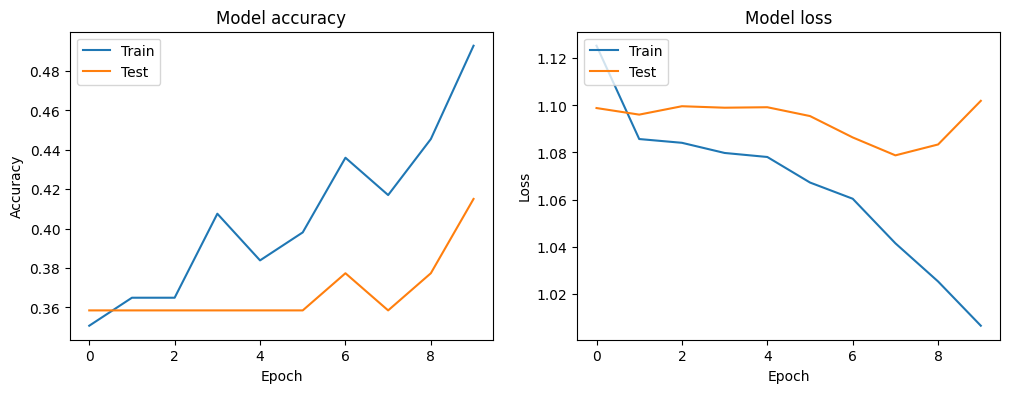

In [9]:
# The code for this section is already included in the provided code. Here it is extracted:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()